# get_housing_value() demo

A quick demonstration of the get_housing_value() function from the ACS_data_retriever library. The function is used to gather the value of housing units in Massachusetts over the 15 year period covered by the American Communities Survey and then displays the change in percentage of each group over time. 

We start by importing the necessary packages

In [1]:
# Get the root directory of the project (assumes the notebook is in /notebooks)
import os
import sys
project_root = os.path.abspath(os.path.join(os.path.dirname("__file__"), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# import other packages 
from ACS_retriever import get_housing_value
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

The data is then gathered. To get data for Massachusetts, we use the MA ucgid code (0400000US25) and index each year's data for that code in the loop. We end by checking the resulting dataframe to make sure we gathered all the correct data. 

In [3]:
# set code for Massachusetts 
MAcode = '0400000US25'

# initialize DataFrame 
MA_data = pd.DataFrame()

# iterate through all years of the ACS and gather data for MA
for year in np.arange(2009,2024):

    # make API call for single year data 
    year_data = get_housing_value(str(year),'state',as_percent=True)
    
    # extract row for Massachusetts 
    year_MA_data = year_data[year_data['ucgid'] == MAcode].copy()
    
    # add value for year 
    year_MA_data['Year'] = year

    # concatenate to MA DataFrame 
    MA_data = pd.concat([MA_data,year_MA_data],ignore_index = True)

# check dataframe 
MA_data.head()

,ucgid,"Less than $50,000","$50,000 to $99,999","$100,000 to $149,999","$150,000 to $199,999","$200,000 to $299,999","$300,000 to $499,999","$500,000 to $999,999","$1,000,000 or more",Year
0,0400000US25,1.2,1.4,3.8,7.3,21.7,40.9,20.0,3.6,2009
1,0400000US25,1.4,1.4,3.7,7.5,22.8,40.4,19.3,3.6,2010
2,0400000US25,1.6,1.4,3.8,8.1,24.3,39.1,18.2,3.6,2011
3,0400000US25,1.9,1.6,4.0,8.6,25.2,37.8,17.3,3.5,2012
4,0400000US25,2.3,1.7,4.4,9.2,25.3,36.7,17.0,3.4,2013


Lastly, to visualize the change in each group, we normalize the values to the first year (2009) and then plot the change over time. 

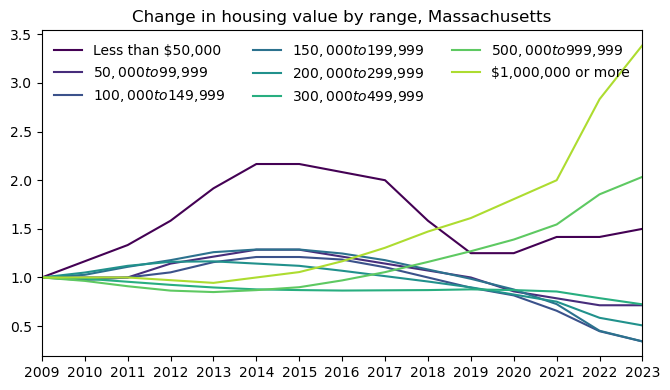

In [7]:
# plot change over time  

# get subset of columns for plotting 
MA_subset = MA_data.drop(columns=['ucgid','Year'])

# normalize to 2009 data 
MA_subset = MA_subset.div(MA_subset.iloc[0])

# set figure size 
plt.figure(figsize=(7,4))

# plot each marital status 
for i,col in enumerate(MA_subset.columns):
    plt.plot(MA_data['Year'],MA_subset[col], label=col,
            color=plt.cm.viridis(i/len(MA_subset.columns)))

# display legend 
plt.legend(frameon=0,ncol=3)

# title plot 
plt.title('Change in housing value by range, Massachusetts')

# label each x tick with the year 
plt.xlim([2009,2023])
plt.xticks(np.arange(2009,2024))

# display plot 
plt.tight_layout()
plt.show()